<a href="https://colab.research.google.com/github/Raheelrazzaq063/finalyearproject/blob/main/breast_cancer_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [4]:
df = pd.read_csv("/content/drive/MyDrive/breast-cancer-data.csv")
df

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'


In [5]:
# Check first 5 lines
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


In [6]:
# Check last 5 lines
df.tail()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'
285,50-59',ge40',40-44',0-2',no',3',left',right_up',no',no-recurrence-events'


In [7]:
# Check Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [8]:
# Null Data
df.isna().sum()

,0
age,0
menopause,0
tumer-size,0
inv-nodes,0
node-caps,8
deg-malig,0
breast,0
breast-quad,1
irradiate,0
class,0


In [9]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create the imputer for most frequent strategy
most_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Apply imputation and flatten the output before assigning it back
df["node-caps"] = most_imputer.fit_transform(df[["node-caps"]]).ravel()
df["breast-quad"] = most_imputer.fit_transform(df[["breast-quad"]]).ravel()


In [10]:
# Null Data
df.isna().sum()

,0
age,0
menopause,0
tumer-size,0
inv-nodes,0
node-caps,0
deg-malig,0
breast,0
breast-quad,0
irradiate,0
class,0


In [11]:
# Check row and column numbers
rows = df.shape[0]
cols = df.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 286
Columns: 10


In [12]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 14


In [13]:
# Number of unique values per column.
df.nunique()

,0
age,6
menopause,3
tumer-size,11
inv-nodes,7
node-caps,2
deg-malig,3
breast,2
breast-quad,5
irradiate,2
class,2


In [14]:
# Check the unique values and frequency for 'class'
df['class'].value_counts()

,count
class,
no-recurrence-events',201
recurrence-events',85


<ipython-input-15-c0dffdf04e39>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="magma")


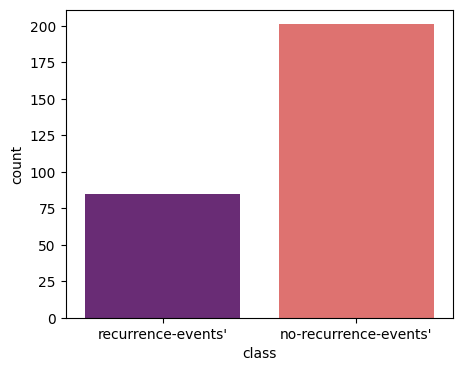

In [15]:
# Class - Target Feature

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x=df["class"], palette="magma")
plt.show()

<ipython-input-16-55a51200f5ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["age"], palette="tab10")


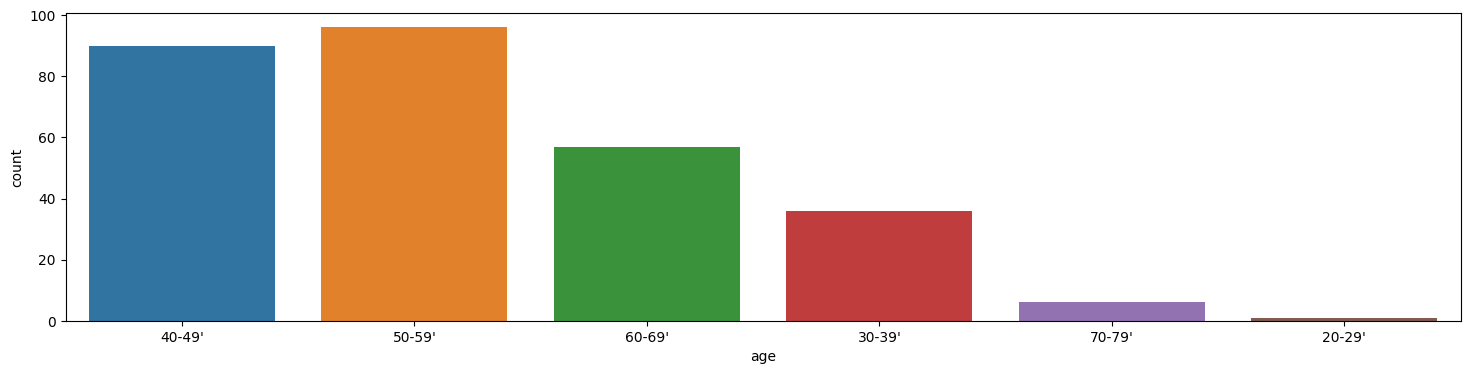

In [16]:
# Age

fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x=df["age"], palette="tab10")
plt.show()

<ipython-input-17-23de8576c8da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["menopause"], palette="tab10")


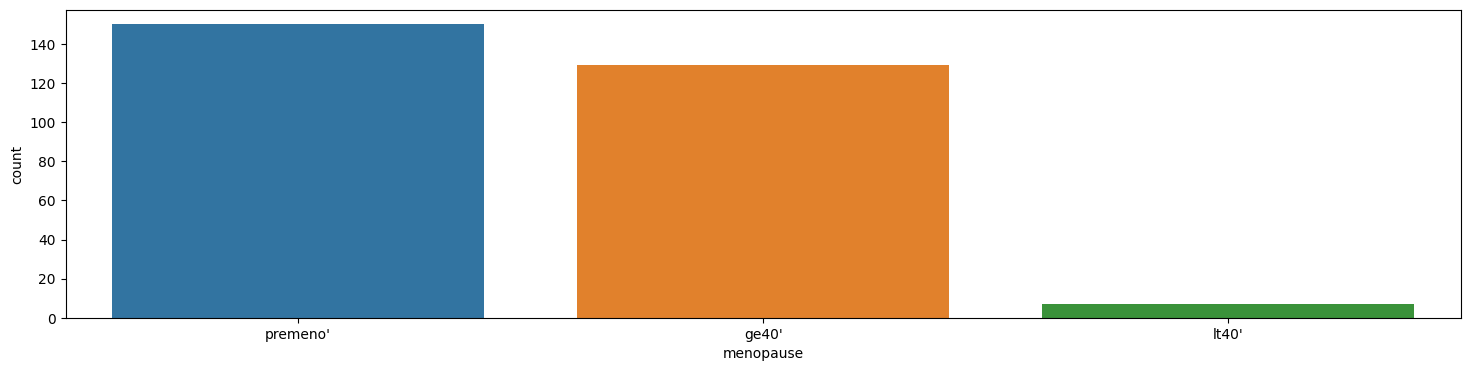

In [17]:
# Menopause

fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x=df["menopause"], palette="tab10")
plt.show()

<ipython-input-18-1b0dd1130139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["tumer-size"], palette="tab10")


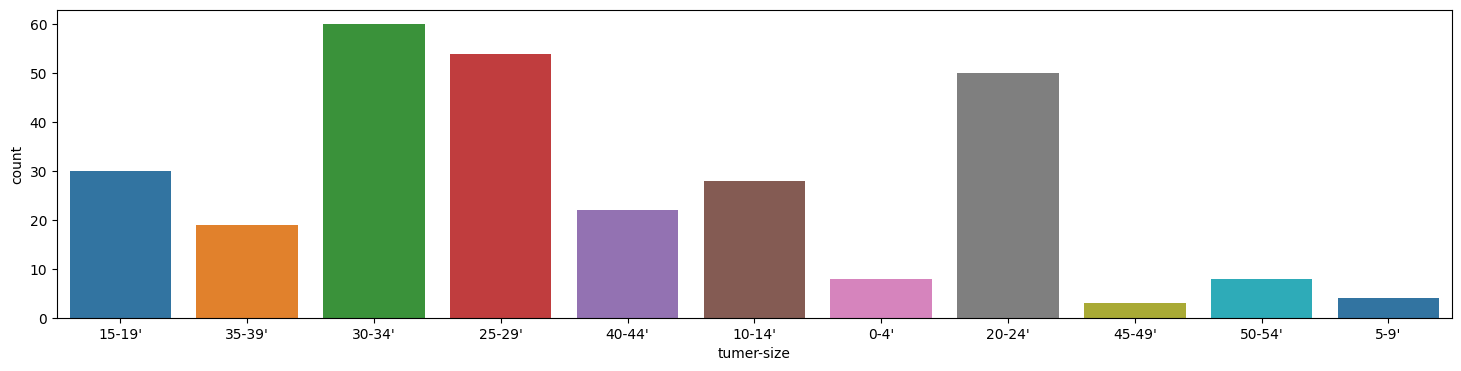

In [18]:
# Tumer Size

fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x=df["tumer-size"], palette="tab10")
plt.show()

In [19]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [20]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,2,2,2,0,1,2,1,2,0,1
1,3,0,2,0,0,0,1,0,0,0
2,3,0,6,0,0,1,0,1,0,1
3,2,2,6,0,1,2,1,1,1,0
4,2,2,5,4,1,1,0,4,0,1


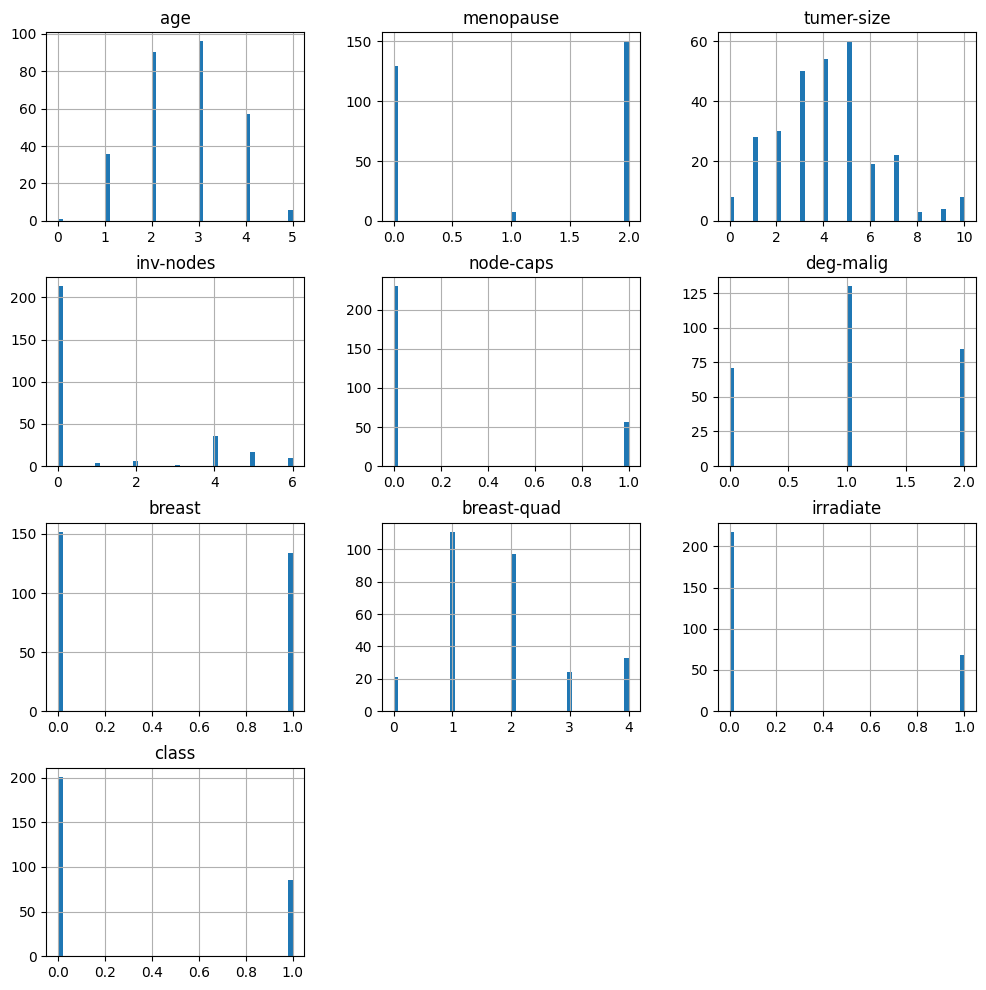

In [21]:
# Histogram Dataset

df.hist(bins=50, figsize=(12,12))
plt.show()

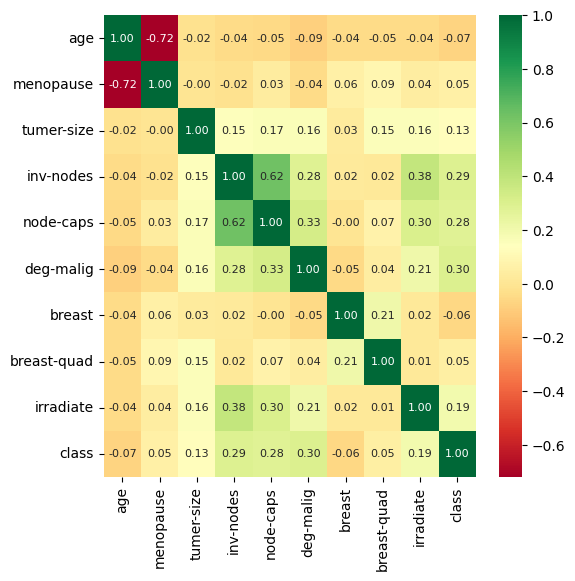

In [22]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8}, ax=ax)
plt.show()

<ipython-input-23-36a9cda9f7f4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr.append(data[i])


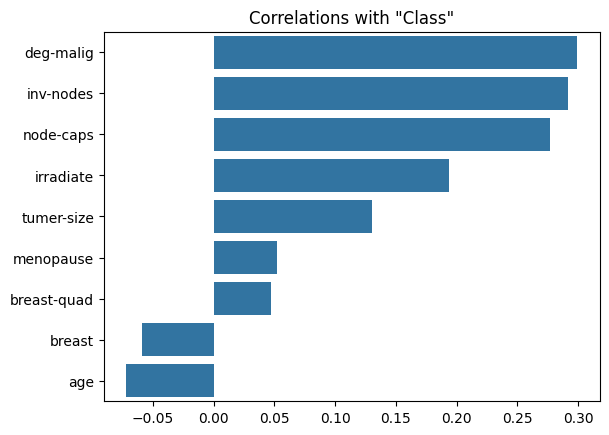

In [23]:
# Correlations with "Class"

limit = -1.0

data = df.corr()["class"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Class"')
plt.show()

In [24]:
# assign X and y values
X,y=df.drop("class",axis=1),df[['class']]

In [25]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((228, 9), (58, 9), (228, 1), (58, 1))

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize models
lr = LogisticRegression()
svm = SVC()
d_tree = DecisionTreeClassifier()
r_forest = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

# Fit models to training data
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
d_tree.fit(X_train, y_train)
r_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict with models
pred_lr = lr.predict(X_train)
pred_svm = svm.predict(X_train)
pred_d_tree = d_tree.predict(X_train)
pred_r_forest = r_forest.predict(X_train)
pred_xgb = xgb_model.predict(X_train)

# Evaluation - Accuracy, Confusion Matrix, Classification Report
print("Logistic Regression Accuracy:", accuracy_score(y_train, pred_lr))
print("SVM Accuracy:", accuracy_score(y_train, pred_svm))
print("Decision Tree Accuracy:", accuracy_score(y_train, pred_d_tree))
print("Random Forest Accuracy:", accuracy_score(y_train, pred_r_forest))
print("XGBoost Accuracy:", accuracy_score(y_train, pred_xgb))



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Logistic Regression Accuracy: 0.7543859649122807
SVM Accuracy: 0.7236842105263158
Decision Tree Accuracy: 0.9868421052631579
Random Forest Accuracy: 0.9868421052631579
XGBoost Accuracy: 0.9780701754385965


In [27]:

print("\nClassification Report for Logistic Regression:\n", classification_report(y_train, pred_lr))
print("Classification Report for SVM:\n", classification_report(y_train, pred_svm))
print("Classification Report for Decision Tree:\n", classification_report(y_train, pred_d_tree))
print("Classification Report for Random Forest:\n", classification_report(y_train, pred_r_forest))
print("Classification Report for XGBoost:\n", classification_report(y_train, pred_xgb))




Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.94      0.84       161
           1       0.68      0.31      0.43        67

    accuracy                           0.75       228
   macro avg       0.72      0.63      0.64       228
weighted avg       0.74      0.75      0.72       228

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83       161
           1       0.67      0.12      0.20        67

    accuracy                           0.72       228
   macro avg       0.70      0.55      0.52       228
weighted avg       0.71      0.72      0.65       228

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       0.98      0.97      0.98        67

    accuracy                           0.99       228
   ma

In [28]:
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_train, pred_lr))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_train, pred_svm))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_train, pred_d_tree))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_train, pred_r_forest))
print("Confusion Matrix for XGBoost:\n", confusion_matrix(y_train, pred_xgb))


Confusion Matrix for Logistic Regression:
 [[151  10]
 [ 46  21]]
Confusion Matrix for SVM:
 [[157   4]
 [ 59   8]]
Confusion Matrix for Decision Tree:
 [[160   1]
 [  2  65]]
Confusion Matrix for Random Forest:
 [[159   2]
 [  1  66]]
Confusion Matrix for XGBoost:
 [[161   0]
 [  5  62]]



Logistic Regression Evaluation:
Accuracy:  0.7544
Precision: 0.7403
Recall:    0.7544
F1 Score:  0.7216


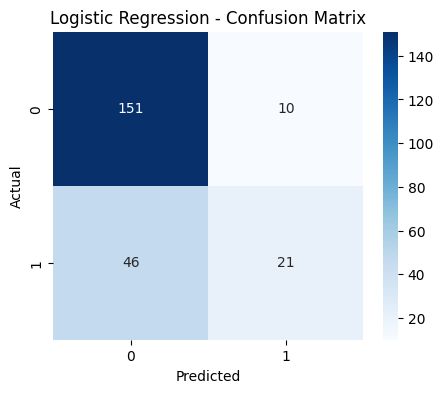


SVM Evaluation:
Accuracy:  0.7237
Precision: 0.7092
Recall:    0.7237
F1 Score:  0.6477


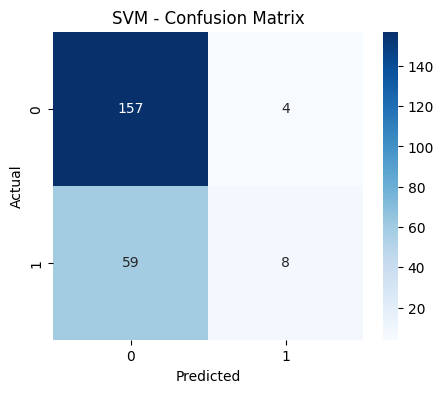


Decision Tree Evaluation:
Accuracy:  0.9868
Precision: 0.9868
Recall:    0.9868
F1 Score:  0.9868


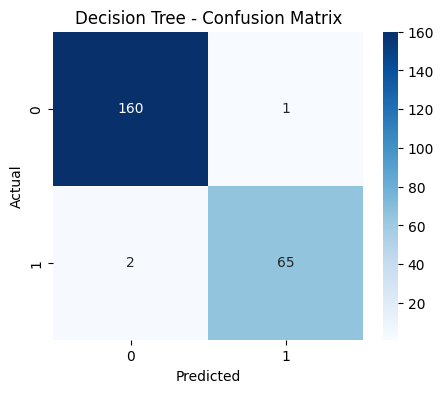


Random Forest Evaluation:
Accuracy:  0.9868
Precision: 0.9869
Recall:    0.9868
F1 Score:  0.9869


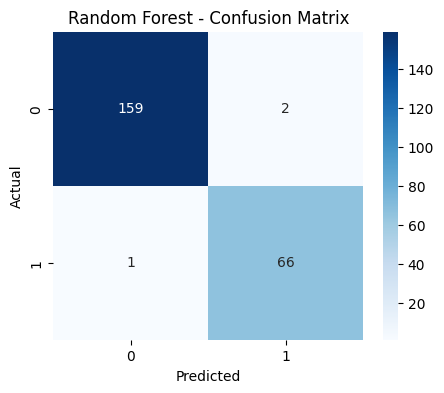


XGBoost Evaluation:
Accuracy:  0.9781
Precision: 0.9787
Recall:    0.9781
F1 Score:  0.9778


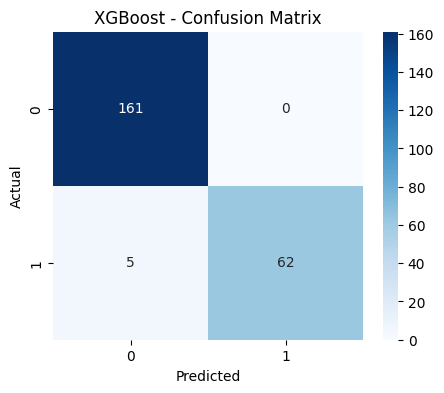

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Helper function to evaluate and visualize model performance
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')  # Add recall
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_mat = confusion_matrix(y_true, y_pred)

    # Print metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")  # Print recall
    print(f"F1 Score:  {f1:.4f}")

    # Plotting confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Run evaluation for all models
evaluate_model("Logistic Regression", y_train, pred_lr)
evaluate_model("SVM", y_train, pred_svm)
evaluate_model("Decision Tree", y_train, pred_d_tree)
evaluate_model("Random Forest", y_train, pred_r_forest)
evaluate_model("XGBoost", y_train, pred_xgb)


<ipython-input-30-1c0c0ef7ced0>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Blues_d')


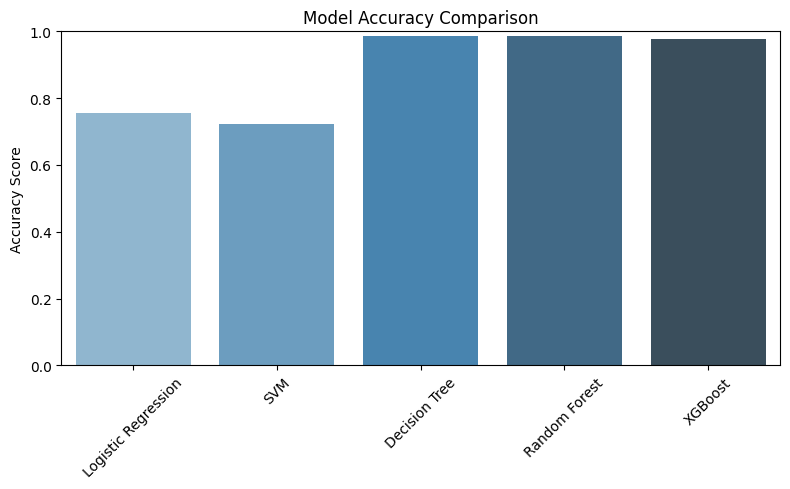

<ipython-input-30-1c0c0ef7ced0>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=precisions, palette='Greens_d')


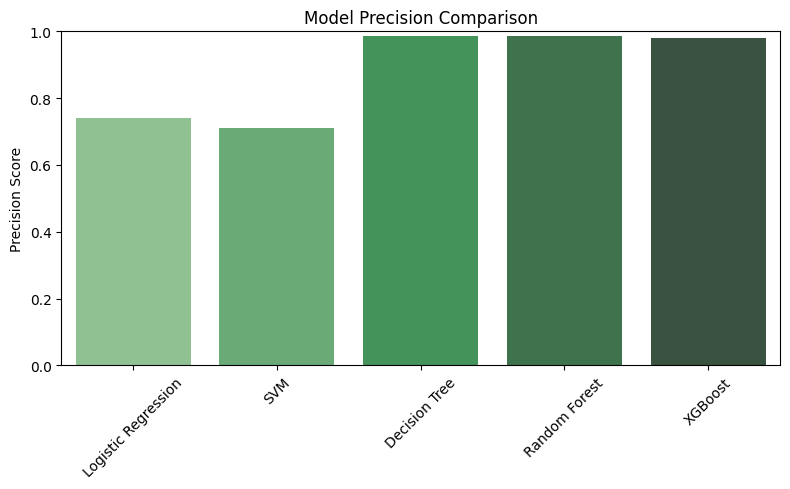

<ipython-input-30-1c0c0ef7ced0>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=recalls, palette='Purples_d')  # Recall plot


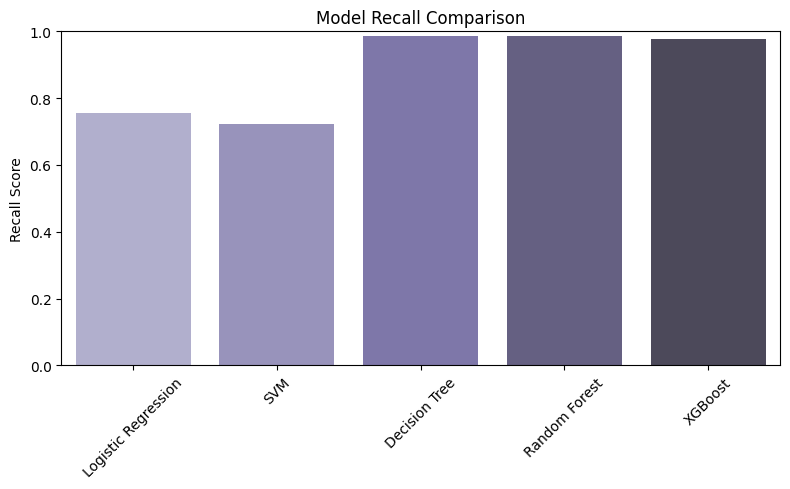

<ipython-input-30-1c0c0ef7ced0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette='Reds_d')


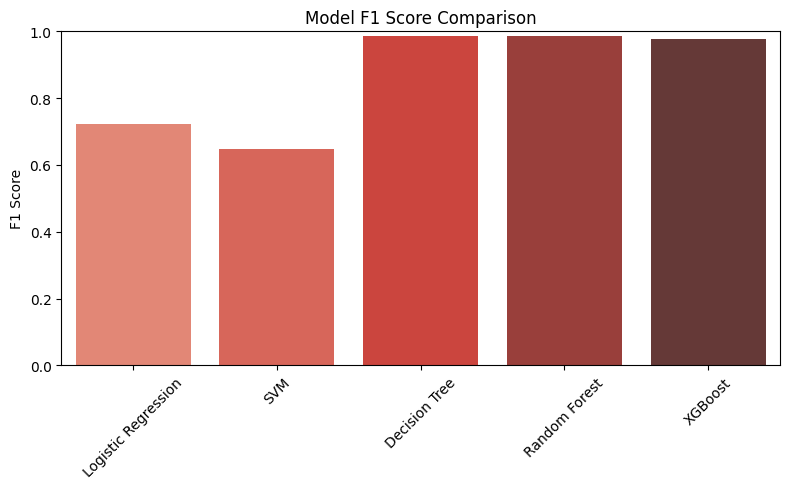

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results
model_names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "XGBoost"]
accuracies = []
precisions = []
recalls = []  # Adding recall
f1_scores = []

# Predictions dictionary (replace with your actual predictions)
predictions = {
    "Logistic Regression": pred_lr,
    "SVM": pred_svm,
    "Decision Tree": pred_d_tree,
    "Random Forest": pred_r_forest,
    "XGBoost": pred_xgb
}

# Collect metrics
for name in model_names:
    acc = accuracy_score(y_train, predictions[name])
    prec = precision_score(y_train, predictions[name], average='weighted')
    rec = recall_score(y_train, predictions[name], average='weighted')  # Compute recall
    f1 = f1_score(y_train, predictions[name], average='weighted')

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)  # Store recall
    f1_scores.append(f1)

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=precisions, palette='Greens_d')
plt.ylim(0, 1)
plt.title('Model Precision Comparison')
plt.ylabel('Precision Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=recalls, palette='Purples_d')  # Recall plot
plt.ylim(0, 1)
plt.title('Model Recall Comparison')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=f1_scores, palette='Reds_d')
plt.ylim(0, 1)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
